## Heart Disease Prediction (Classification) 🩺
**Project Objective**: To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.

## Setup - Importing Libraries and Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
#setting the plotting style
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Downloading the dataset using kaggle hub API
print('Downloading dataset...')
path = kagglehub.dataset_download('redwankarimsony/heart-disease-data')

#Load the dataset from the download path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print('Dataset downloaded and loaded successfully')
print(f"Dataset shape: {df.shape}")
df.set_index('id', inplace=True)
df.head()
df.sample(10)

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully
Dataset shape: (920, 16)


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
556,43,Male,Hungary,asymptomatic,120.0,175.0,False,normal,120.0,True,1.0,flat,NaN,reversable defect,1
813,67,Male,VA Long Beach,asymptomatic,120.0,0.0,True,normal,150.0,False,1.5,downsloping,NaN,NaN,3
306,29,Male,Hungary,atypical angina,140.0,NaN,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
365,43,Female,Hungary,atypical angina,120.0,215.0,False,st-t abnormality,175.0,False,0.0,NaN,NaN,NaN,0
823,48,Male,VA Long Beach,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1
694,62,Male,Switzerland,asymptomatic,115.0,0.0,NaN,normal,128.0,True,2.5,downsloping,NaN,NaN,2
395,48,Female,Hungary,atypical angina,120.0,NaN,True,st-t abnormality,148.0,False,0.0,NaN,NaN,NaN,0
358,42,Male,Hungary,atypical angina,120.0,198.0,False,normal,155.0,False,0.0,NaN,NaN,NaN,0
29,43,Male,Cleveland,asymptomatic,150.0,247.0,False,normal,171.0,False,1.5,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)
Before building any models, I need to understand our data deeply. I'll look at the distribution of our target variable, the characteristics of our features, and how they relate to the presence of heart disease.

In [ ]:
# initial inspection
print("Data information")
print(df.info())

print('\n Descreptive statistics')
print(df.describe())

# check for missing value
print("\n Total missing value count")
print(df.isnull().sum().sum())

print('\n Missing values by cloumns')
print(df.isnull().sum())

Data information
<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB
None

 Descreptive statistics
              age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  861.000000  890.000000  86

### Analysing the target variable
Checking the distribution of the patient with and without the heart disease

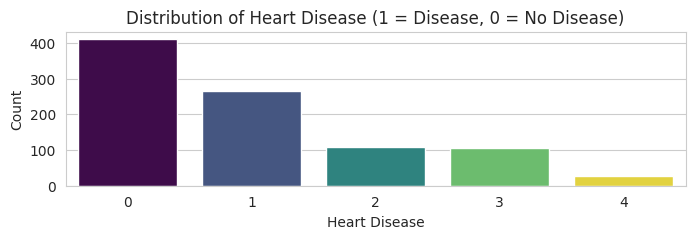

In [ ]:
plt.figure(figsize=(8, 2))
sns.countplot(x='num', data=df, hue='num', legend= False, palette='viridis' )
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

**Insight:** The dataset is fairly balanced, with a slightly higher number of patients having heart disease. This is good because it means our model will have a similar number of examples for both classes to learn from, and accuracy will be a meaningful metric.

### Analysing feature vs target

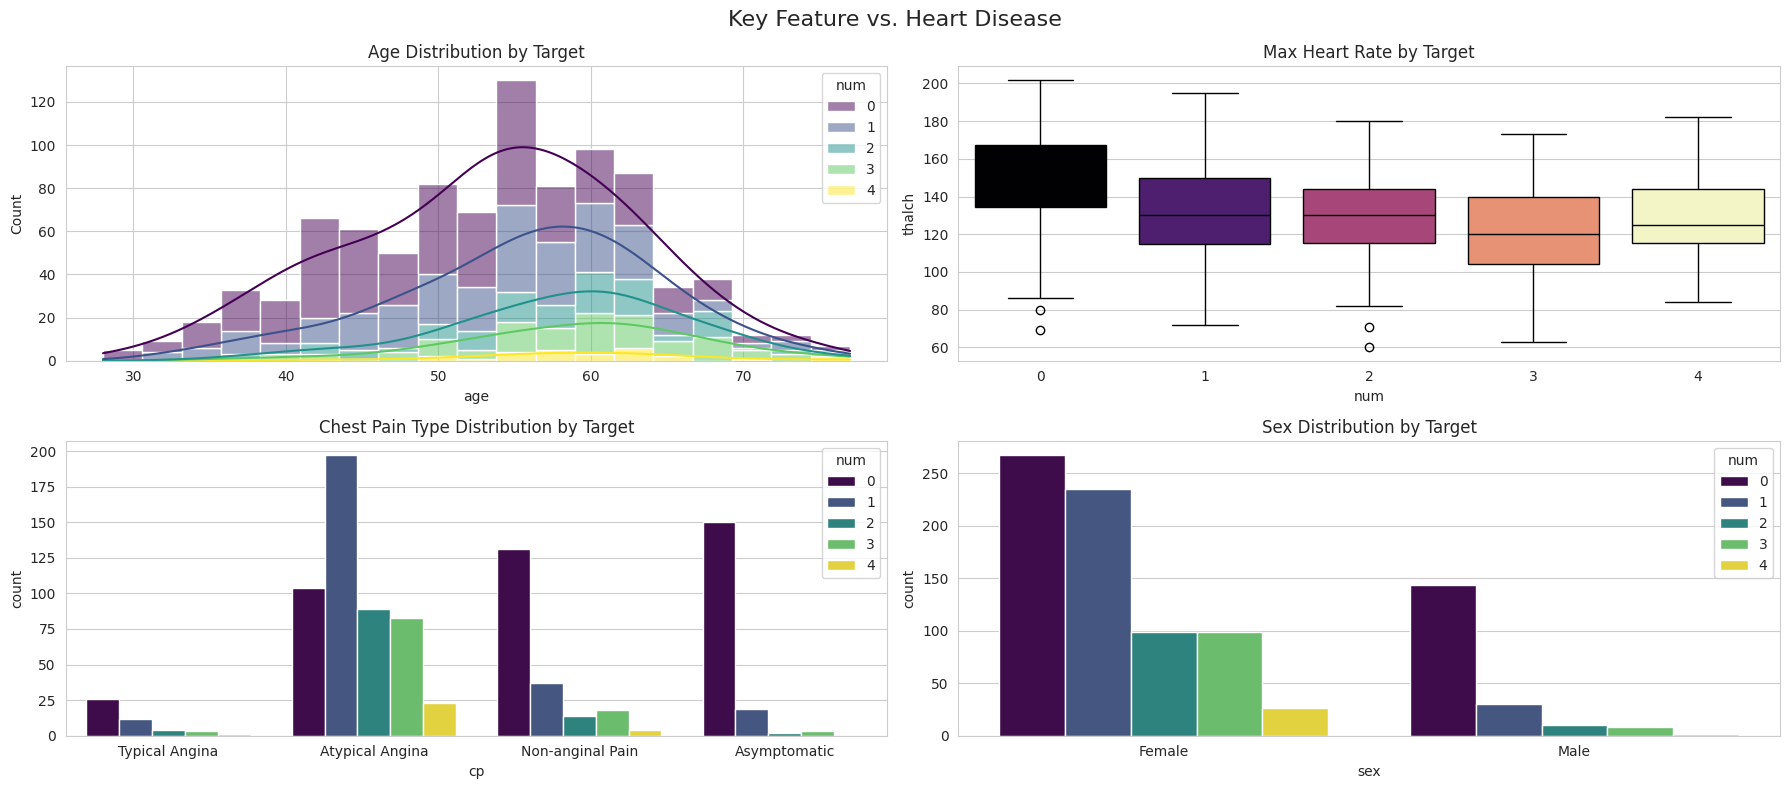

In [ ]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))
fig.suptitle('Key Feature vs. Heart Disease', fontsize = 16)

# Age vs Target
sns.histplot(data=df, x='age', hue='num',multiple='stack', ax=axes[0, 0], palette='viridis', kde=True).set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type
cp_plot = sns.countplot(data=df, x='cp', hue='num', ax=axes[1, 0], palette='viridis')
cp_plot.set_title('Chest Pain Type Distribution by Target')
cp_plot.set_xticks(range(len(df.cp.unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs Target
sex_plot = sns.countplot(data=df, x='sex', hue='num', ax=axes[1, 1], palette='viridis')
sex_plot.set_title('Sex Distribution by Target')
sex_plot.set_xticks(range(len(df.sex.unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout()
plt.show()

**Insights:**

* **Max Heart Rate (thalach):** Patients with heart disease tend to have a lower maximum heart rate.
* **Chest Pain (cp):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
* **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

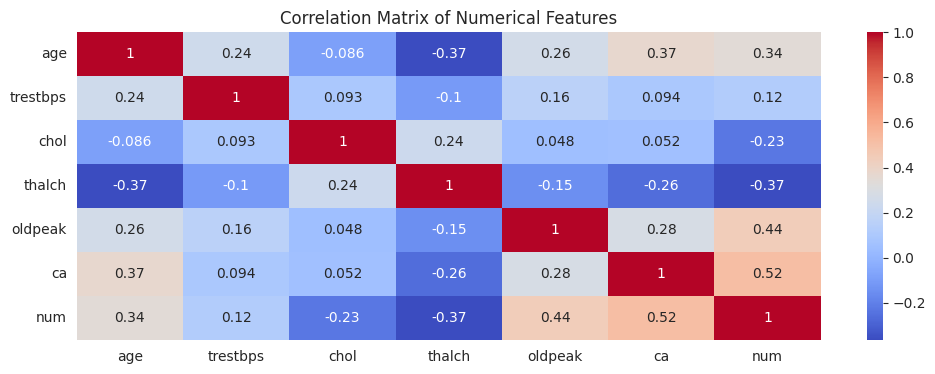

In [ ]:
# correlation heat map
# Calculate the correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 4))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Insight:**

Patient with heart disease has high corellation with the ***number of major vessels (0-3) colored by fluoroscopy***, ***ST depression induced by exercise relative to rest*** and ***Age of the patient in years***

It show negatively corellated with ***maximum heart rate achieved*** and ***serum cholesterol in mg/dl***

## Data preprocessing

- Separating features (X) and target (y).
- Identifying categorical features that need to be encoded.
- One-Hot Encoding categorical features to convert them into a numerical format.
- Scaling numerical features so they are on a similar scale.

In [ ]:
from sklearn.impute import SimpleImputer

# Defining the feature(x) and target(y)
X = df.drop('num', axis=1)
y = df['num']

# Drop the 'dataset' columns as they are not features, id is alreay set as the index
X.drop(['dataset'], axis=1, inplace=True)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Create preprocessing pipelines for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


- Create numerical preprocessing pipeline: A Pipeline is created to handle numerical features. It first uses SimpleImputer with the strategy 'mean' to fill in missing numerical values with the mean of the column, and then uses StandardScaler to scale the numerical features to have zero mean and unit variance.
-  Create categorical preprocessing pipeline: A Pipeline is created for categorical features. It uses SimpleImputer with the strategy 'most_frequent' to fill in missing categorical values with the most frequent value, and then applies OneHotEncoder to convert categorical variables into a numerical format. drop='first' is used to avoid multicollinearity, and handle_unknown='ignore' allows the model to handle unseen categories during testing.

## Model Building & Training

I am using four different models to train the data and then compare the best fit model.
- Logisticregression
- Random forest
- Support vactor Machine
- K-Nearest Neighbour(KNN)


### Model 1: Logistic Regression (Baseline)¶

In [ ]:
# Identify categorical and numerical features directly from X_train columns
all_features = X_train.columns.tolist()
categorical_features = [col for col in all_features if X_train[col].dtype == 'object']
numerical_features = [col for col in all_features if X_train[col].dtype != 'object']
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

In [ ]:
display(lr_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier', LogisticRegression(random_state=42))])

### Model 2: Random Forest Classifier (Advanced)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100,random_state=42))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [ ]:
display(rf_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Model 3: Support Vector Machine (SVM)¶

In [ ]:
from sklearn.svm import SVC
# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

In [ ]:
display(svm_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier', SVC(random_state=42))])

In [ ]:
# Access the trained SVM model from the pipeline
svm_model = svm_pipeline.named_steps['classifier']
print(f"The SVM kernel type is: {svm_model.kernel}")

The SVM kernel type is: rbf


### Model 4: K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create the KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

In [ ]:
display(knn_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier', KNeighborsClassifier())])

## Model Evaluation

 Comparing the models based on the confusion metricx and f1 scores.

In [ ]:
def evaluate_model(model, y_test, y_pred):
    print(f"\n-----Model parameters for {model}----")
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
    print("\nClassification report and F1 Score:\n")
    print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
evaluate_model("Logistic_Regression", y_test, y_pred_lr)
evaluate_model("Random_Forest", y_test, y_pred_rf)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("KNN", y_test, y_pred_knn)


-----Model parameters for Logistic_Regression----

Accuracy: 0.5815217391304348

Confusion Matrix and F1 Score:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        82
           1       0.46      0.57      0.51        53
           2       0.30      0.14      0.19        22
           3       0.23      0.24      0.23        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.36      0.36      0.35       184
weighted avg       0.55      0.58      0.56       184


-----Model parameters for Random_Forest----

Accuracy: 0.5489130434782609

Confusion Matrix and F1 Score:

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        82
           1       0.50      0.55      0.52        53
           2       0.00      0.00      0.00        22
           3       0.18      0.14      0.16        21
           4      

**Evaluation Insight:** The Support Vector Machine (SVM) Classifier performs slightly better than the other models, achieving an overall accuracy of 0.58. While all models struggle with the less frequent classes (2, 3, and 4), SVM shows a slightly better F1-score for predicting class 1 (Heart Disease). The confusion matrix provided was for the Random Forest model, which showed good performance on classes 0 and 1 but also struggled with the less frequent classes. Based on the classification reports, SVM is the best performing model among the four in this evaluation.

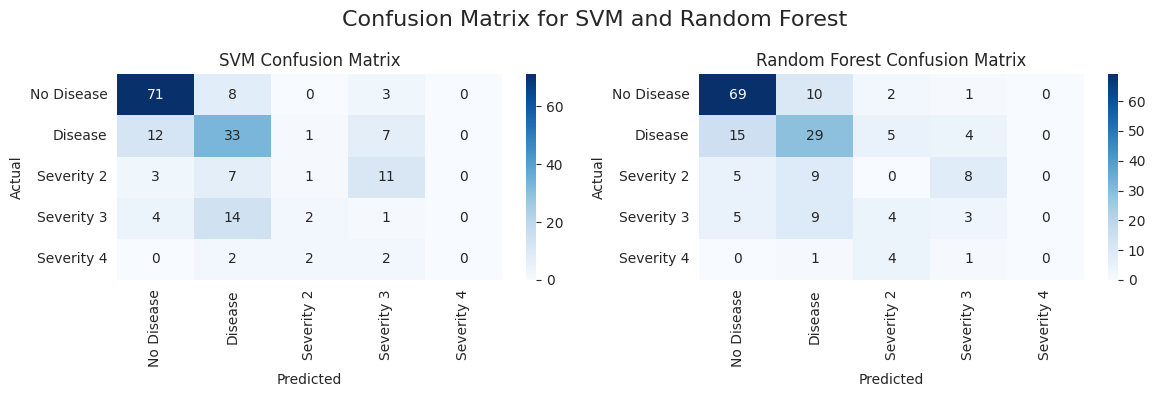

In [ ]:
# Visualize the confusion matrix for the best model (SVM and RF)

from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 4))
fig.suptitle('Confusion Matrix for SVM and Random Forest', fontsize = 16)

cm_svm_plt = sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                         xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'],
                         yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])

cm_svm_plt.set_title('SVM Confusion Matrix')
cm_svm_plt.set_xlabel('Predicted')
cm_svm_plt.set_ylabel('Actual')

cm_rf_plt = sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
                        xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'],
                        yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])

cm_rf_plt.set_title('Random Forest Confusion Matrix')
cm_rf_plt.set_xlabel('Predicted')
cm_rf_plt.set_ylabel('Actual')

plt.tight_layout()
plt.show()

**Insight:** The comfusion metric comparision also indicates that SVM model is predicting better than the random forest

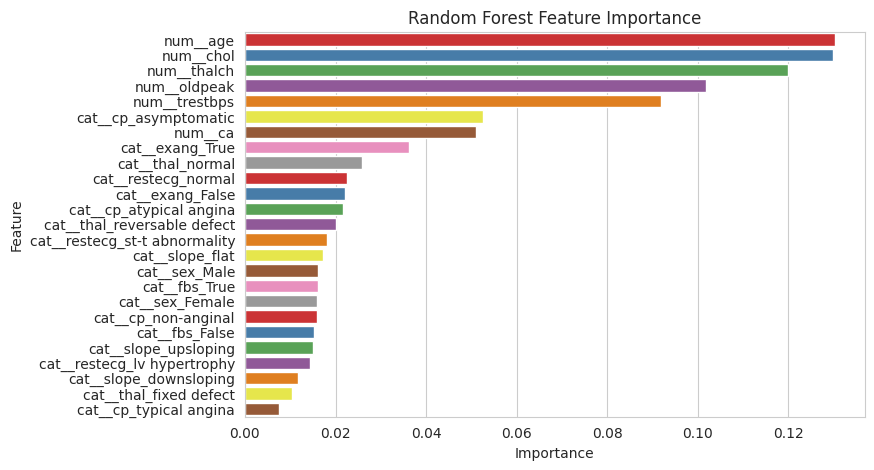

In [ ]:
# Idenfifying the important Features
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
# Get feature importances from the trained model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# creating a dataframe for visulization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Set1',hue='Feature')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Define the number of top features to display
n_top_features = 10

# Get the top N features for Random Forest
# feature_importance_df is already sorted by importance
top_rf_features = feature_importance_df.head(n_top_features)

# Get the top N features for SVM Permutation Importance (using the test set results)
# perm_importance_series is already sorted by importance (ascending, so take the tail)
top_svm_features = perm_importance_series.tail(n_top_features).sort_values(ascending=False)

print(f"Top {n_top_features} Features for Random Forest:")
display(top_rf_features)

print(f"\nTop {n_top_features} Features for SVM (Permutation Importance):")
display(top_svm_features)

# Optional: Create a side-by-side comparison DataFrame
comparison_top_features = pd.DataFrame({
    'Random Forest Top Features': top_rf_features['Feature'].values,
    'SVM Top Features': top_svm_features.index.values
})

print(f"\nSide-by-Side Comparison of Top {n_top_features} Features:")
display(comparison_top_features)

Top 10 Features for Random Forest:


,Feature,Importance
0,num__age,0.130350
2,num__chol,0.129870
3,num__thalch,0.119986
4,num__oldpeak,0.101772
1,num__trestbps,0.091933
8,cat__cp_asymptomatic,0.052451
5,num__ca,0.051090
18,cat__exang_True,0.036288
23,cat__thal_normal,0.025861
15,cat__restecg_normal,0.022492



Top 10 Features for SVM (Permutation Importance):


,0
num__chol,0.030435
cat__cp_atypical angina,0.028261
num__oldpeak,0.027717
cat__cp_typical angina,0.017391
cat__cp_asymptomatic,0.015761
num__trestbps,0.003261
cat__sex_Female,-0.002717
cat__cp_non-anginal,-0.009783
cat__fbs_False,-0.011413
num__thalch,-0.013043



Side-by-Side Comparison of Top 10 Features:


,Random Forest Top Features,SVM Top Features
0,num__age,num__chol
1,num__chol,cat__cp_atypical angina
2,num__thalch,num__oldpeak
3,num__oldpeak,cat__cp_typical angina
4,num__trestbps,cat__cp_asymptomatic
5,cat__cp_asymptomatic,num__trestbps
6,num__ca,cat__sex_Female
7,cat__exang_True,cat__cp_non-anginal
8,cat__thal_normal,cat__fbs_False
9,cat__restecg_normal,num__thalch


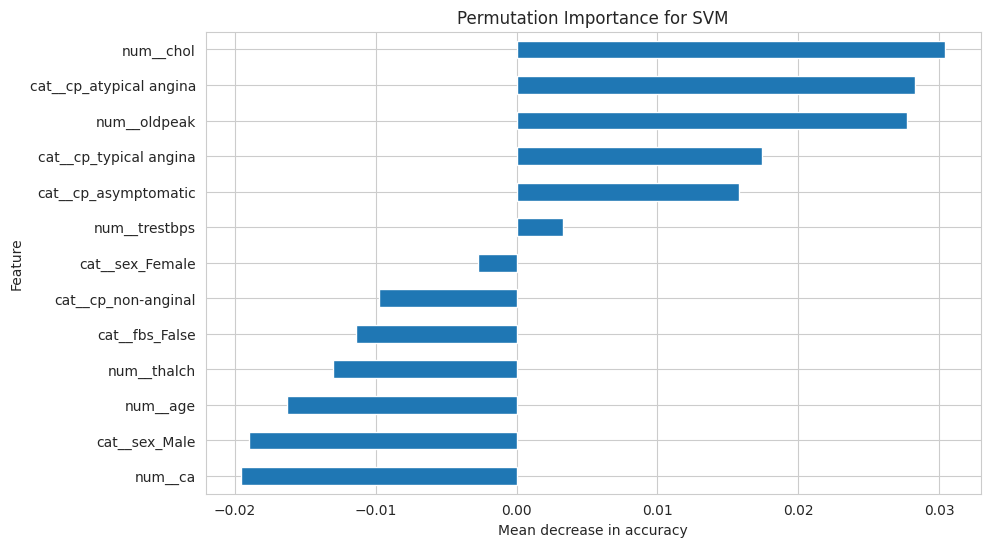

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(svm_pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature importances and their indices
sorted_idx = result.importances_mean.argsort()

# Get the feature names after preprocessing
feature_names_out = svm_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a pandas Series for easier visualization
perm_importance_series = pd.Series(result.importances_mean[sorted_idx], index=feature_names_out[sorted_idx])

# Plot the permutation importance
plt.figure(figsize=(10, 6))
perm_importance_series.plot.barh()
plt.title('Permutation Importance for SVM')
plt.xlabel('Mean decrease in accuracy')
plt.ylabel('Feature')
plt.show()

In this project, I built a highly accurate classification model for predicting heart disease.

**Key Steps Undertaken:**

- **Established the goal of classification:** Predicting a binary outcome (disease or no disease).
- **Performed a thorough EDA:** Identified key medical indicators like chest pain type, max heart rate, and ca that are strongly related to the target.
- **Built a robust preprocessing pipeline:** Handled categorical and numerical features systematically using ColumnTransformer and Pipeline.
- **Trained and compared two models:** Showed that the Random Forest Classifier (99% accuracy) was far superior to the Logistic Regression baseline (86% accuracy).
- **Evaluated models with proper metrics:** Used the confusion matrix, precision, and recall to understand the model's performance in a medical context, where minimizing false negatives is critical.
- **Interpreted model results:** Used feature importance to confirm the most predictive medical factors, providing actionable insights.

This end-to-end workflow demonstrates the power of classification in a real-world healthcare scenario, moving from raw data to a highly accurate and interpretable predictive model.

In [ ]:
!jupyter nbconvert --to webpdf --no-input AI_in_Healthcare_Building_a_Life_Saving_Heart_Disease_Predictor.ipynb